In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 63)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,forward_CommercialShortPosition_to_openinterest_change,ManagedMoney_NetPosition_to_openinterest_change,prior_report_ManagedMoney_NetPosition_to_openinterest_change,forward_ManagedMoney_NetPosition_to_openinterest_change,ManagedMoney_LongPosition_to_openinterest_change,prior_report_ManagedMoney_LongPosition_to_openinterest_change,forward_ManagedMoney_LongPosition_to_openinterest_change,ManagedMoney_ShortPosition_to_openinterest_change,prior_report_ManagedMoney_ShortPosition_to_openinterest_change,forward_ManagedMoney_ShortPosition_to_openinterest_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,-0.010335,-0.001610,-0.027664,-0.001536,0.006267,-0.021889,0.00081,0.007877,0.005775,0.002346
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,NaN,-0.001536,-0.001610,NaN,0.000810,0.006267,NaN,0.002346,0.007877,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'F1_RolledPrice_rolling_20D_volatility',
 'F2_RolledPrice_rolling_20D_volatility',
 'F3_RolledPrice_rolling_20D_volatility',
 'SyntheticF1MinusF2_RolledPrice',
 'prior_report_SyntheticF1MinusF2_RolledPrice_change',
 'prior_cumulative_5D_F1_V

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
for name in [ 'prior_cumulative_5D_F1_Volume',
                 'prior_cumulative_5D_F2_Volume',
                 'prior_cumulative_5D_F1MinusF2_Volume' ,
            'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice']:
    dataset[f'{name}_change'] = dataset[name] - dataset[name].shift(1)
    dataset[f'next_{name}_change'] =  dataset[name].shift(-1) - dataset[name] 
    
    

In [23]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'F1_RolledPrice_rolling_20D_volatility',
 'F2_RolledPrice_rolling_20D_volatility',
 'F3_RolledPrice_rolling_20D_volatility',
 'SyntheticF1MinusF2_RolledPrice',
 'prior_report_SyntheticF1MinusF2_RolledPrice_change',
 'prior_cumulative_5D_F1_V

In [24]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [25]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [26]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [27]:
response_names =  ['ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change'] 



In [28]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [29]:
import json

In [30]:
with open("wti_cot_mm_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [31]:
selected_features_by_response

{'ManagedMoney_NetPosition_to_openinterest_change': ['prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_to_openinterest_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'F3_RolledPrice_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change'],
 'ManagedMoney_ShortPosition_to_openinterest_change': ['prior_cumulative_5D_F2_Volume_change',
  'prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'F1_RolledPrice_change']}

In [32]:
from src.preprocessing.base import Winsorizer

In [33]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


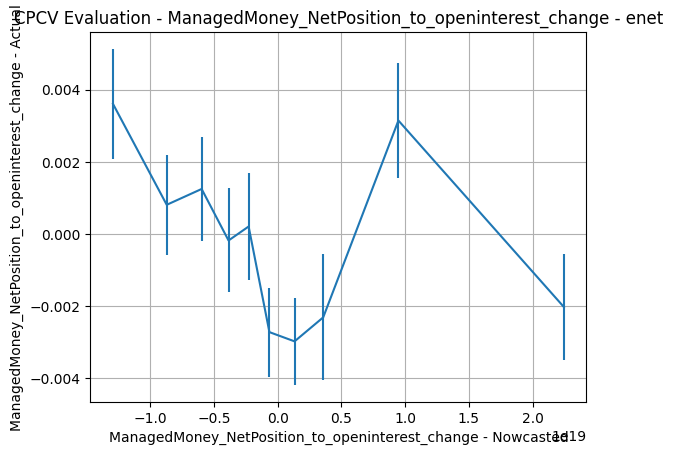

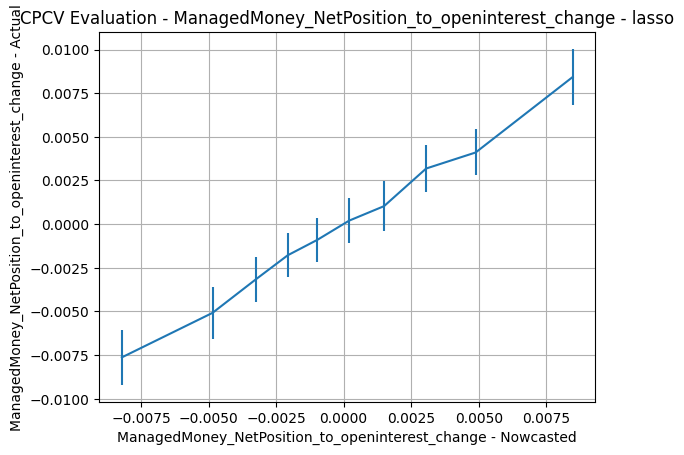

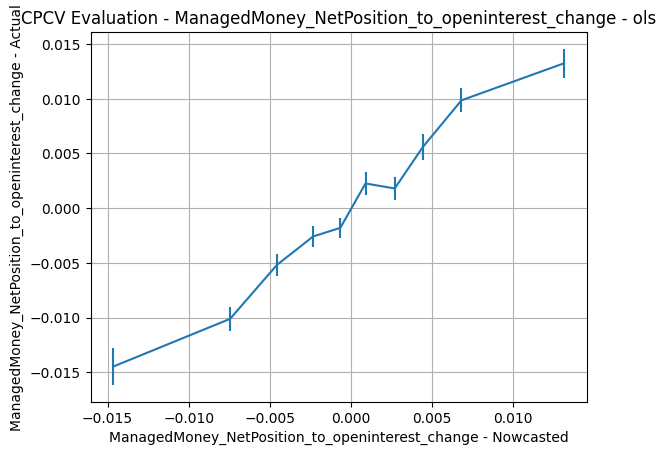

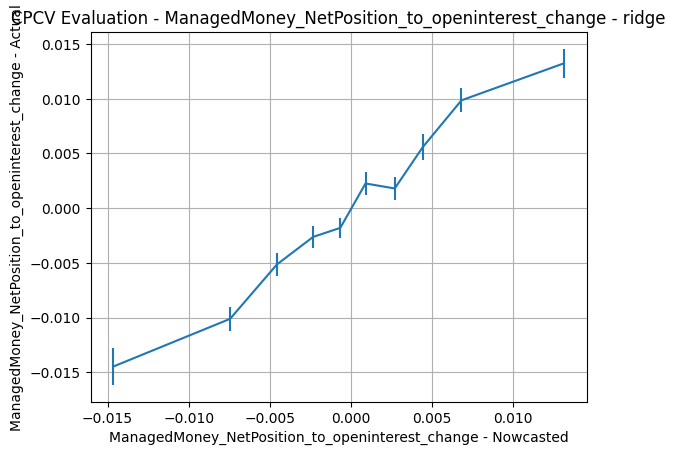

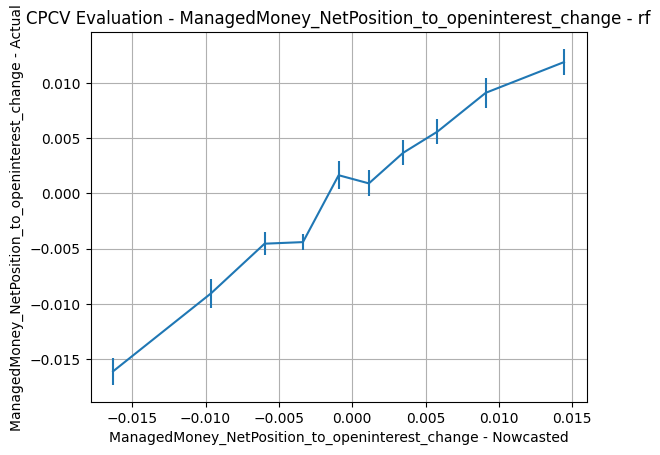

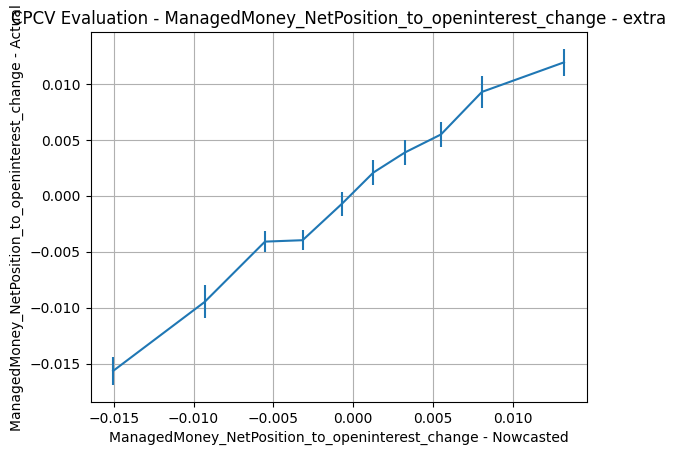

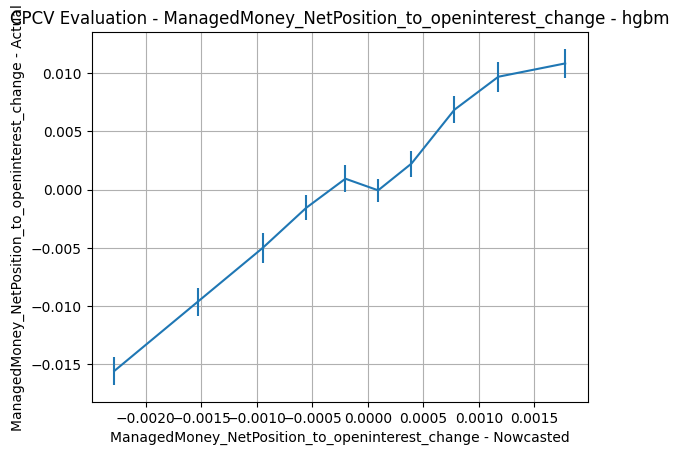

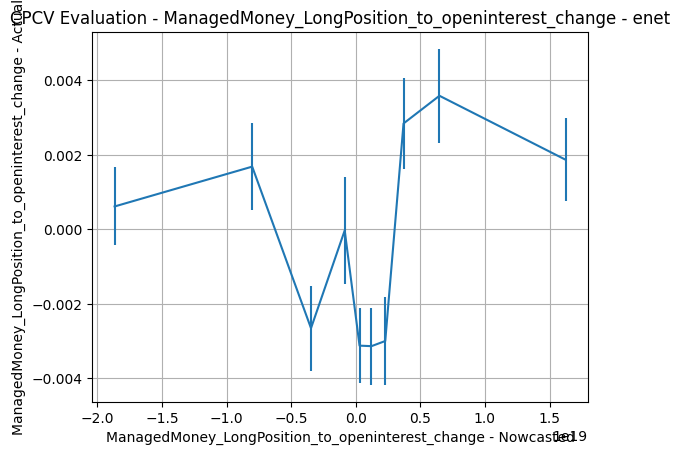

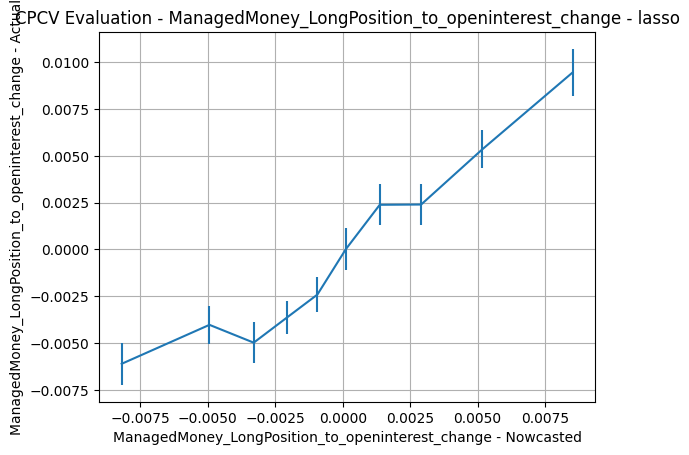

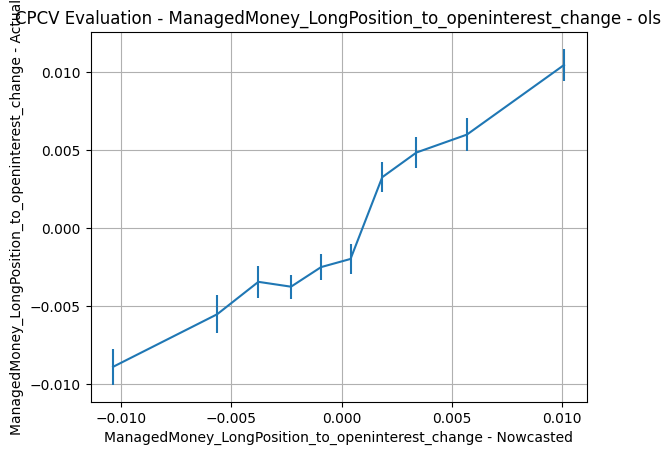

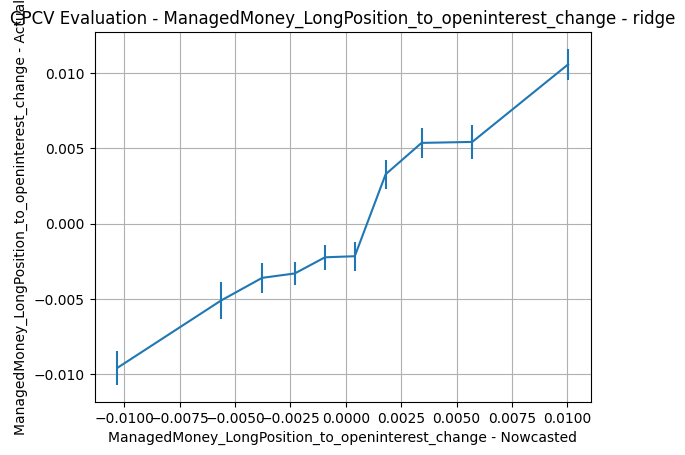

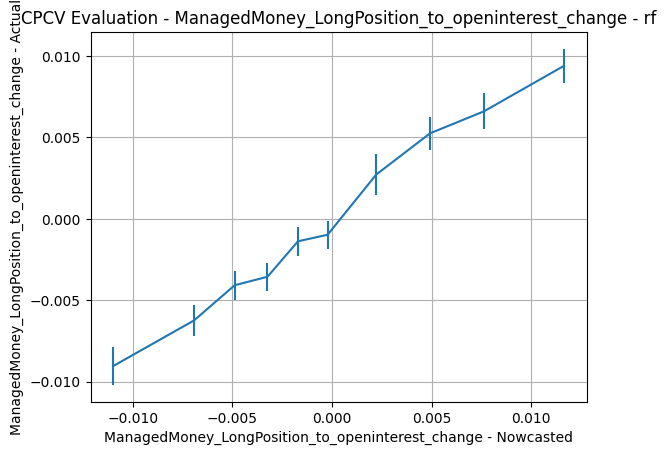

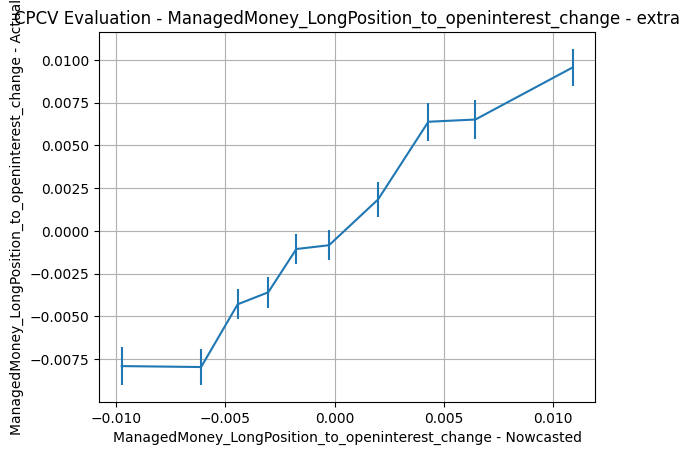

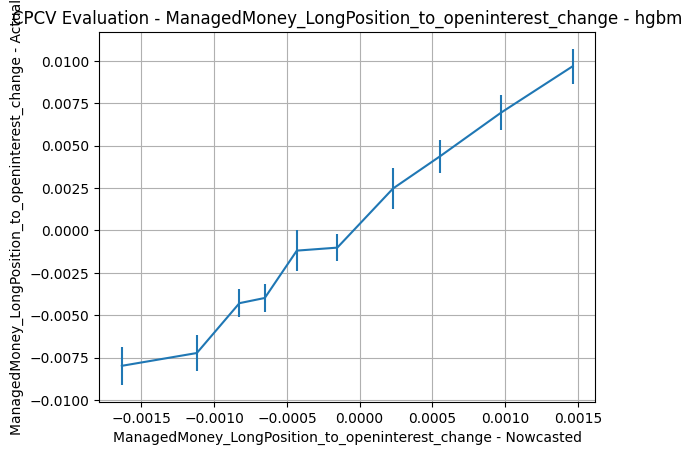

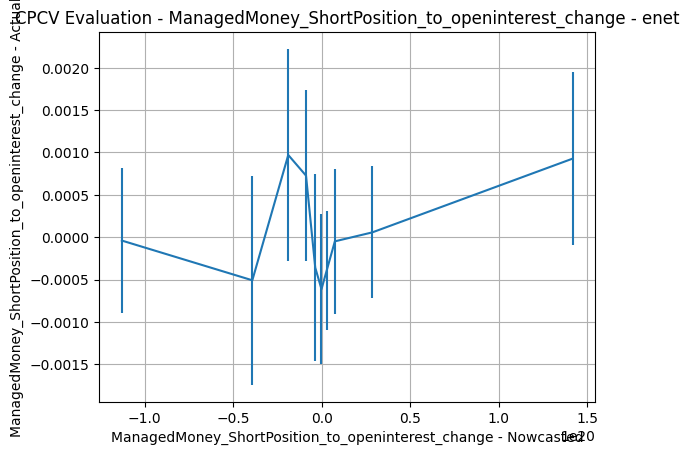

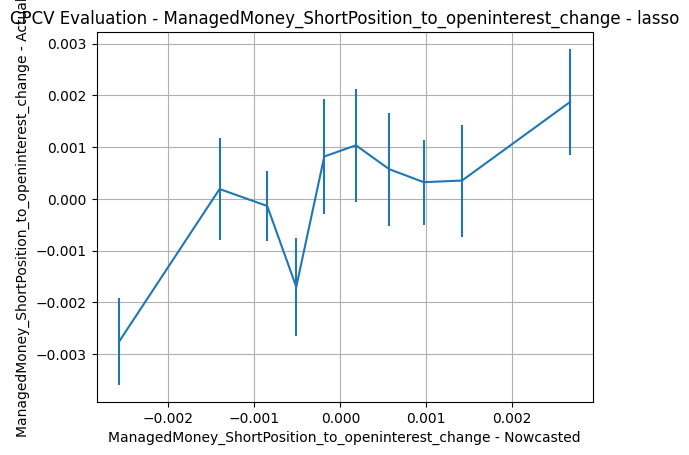

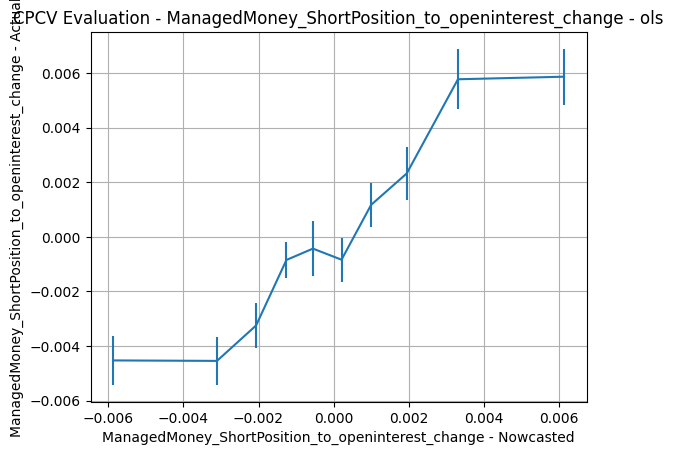

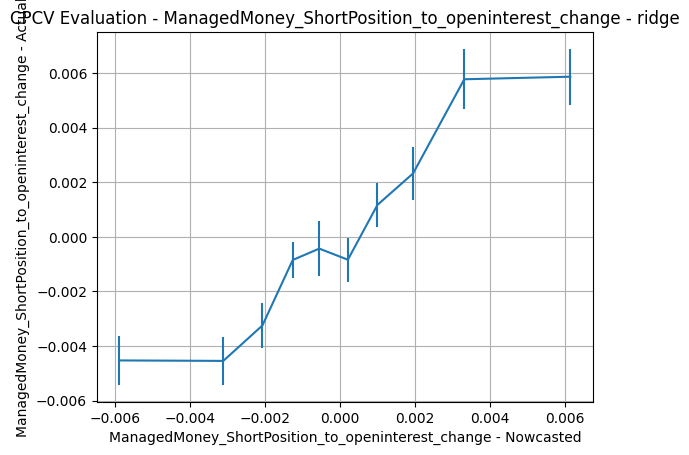

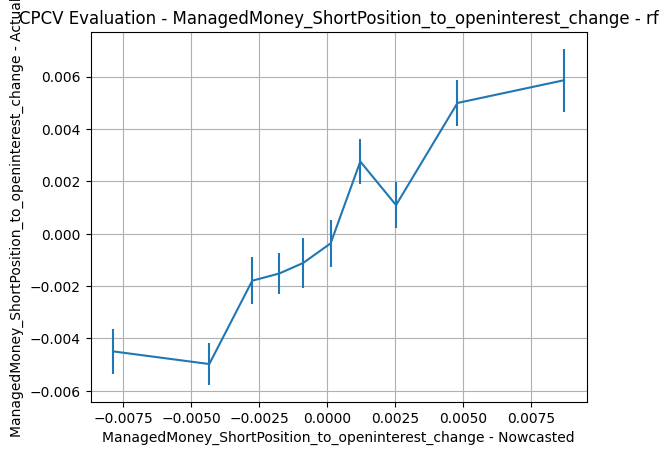

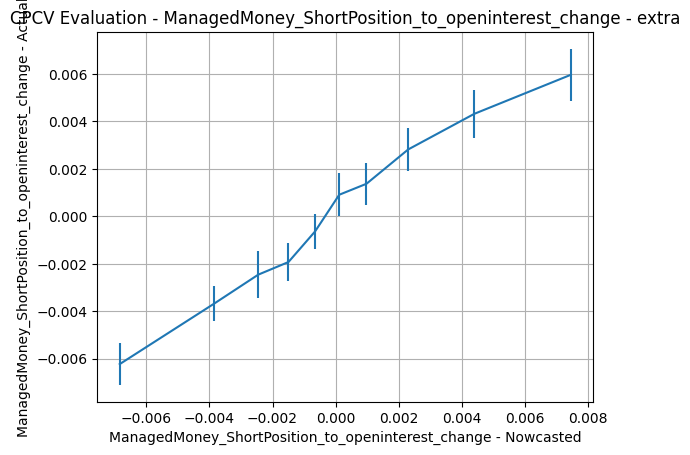

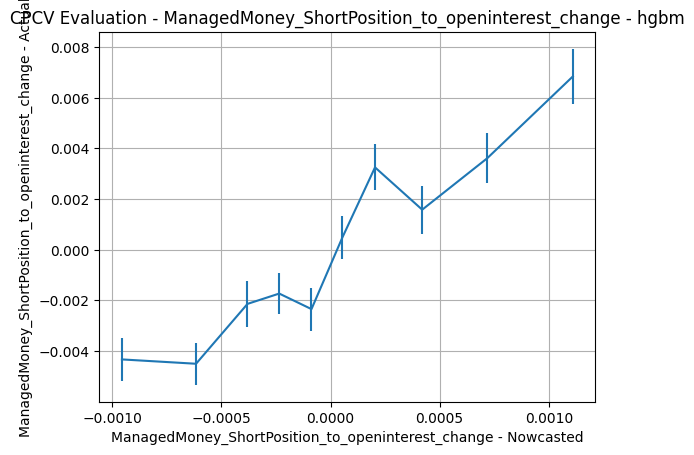

In [36]:
all_performance = {}

for (response_name, feature_names) in selected_features_by_response.items():
    Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
    Xy.reset_index(drop=True, inplace= True)
    response_performance = {}
    for (estimator_name, estimator) in  estimators_.items():
        yhat = cpcv_predict( estimator ,
                    Xy[feature_names],
                        Xy[response_name],
                        cv=cv,
                        method = 'predict',
                        n_jobs=10)
        response_performance[estimator_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {estimator_name}')
        plt.show()
        plt.close()
    all_performance[response_name] = response_performance

In [37]:
best_model_df = pd.DataFrame(all_performance).idxmax(axis=0).reset_index()

In [38]:
best_model_dict = dict(zip(best_model_df["index"], best_model_df[0]))


In [39]:
best_model_dict

{'ManagedMoney_NetPosition_to_openinterest_change': 'extra',
 'ManagedMoney_LongPosition_to_openinterest_change': 'rf',
 'ManagedMoney_ShortPosition_to_openinterest_change': 'extra'}

In [40]:
import json
with open("wti_cot_mm_selected_models.json", "w") as f:
    json.dump(best_model_dict, f)

In [41]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners

In [53]:
# pip install optuna
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

# ---- your CPCV + cpcv_predict are assumed available ----
# from yourpackage.validation import CombinatorialPurgedCV, cpcv_predict

RANDOM_STATE = 42

def build_estimator_from_trial(trial: optuna.Trial):
    """Choose a model family and its hyperparameters conditionally."""
    model_name = trial.suggest_categorical(
        "model",
        ["enet", "lasso", "ols", "ridge", "rf", "extra", "hgbm"]
    )

    if model_name == "enet":
        alpha = trial.suggest_float("enet_alpha", 1e-6, 1e-1, log=True)
        l1_ratio = trial.suggest_float("enet_l1_ratio", 0.0, 1.0)
        loss = trial.suggest_categorical("enet_loss", ["squared_error", "huber"])
        # (Optional) huber epsilon if chosen
        epsilon = trial.suggest_float("enet_epsilon", 1e-3, 0.2) if loss == "huber" else 0.1
        base = SGDRegressor(
            penalty="elasticnet",
            alpha=alpha,
            l1_ratio=l1_ratio,
            loss=loss,
            epsilon=epsilon,
            max_iter=3000,
            tol=1e-3,
            random_state=RANDOM_STATE
        )
        # linear models benefit from scaling
        est = Pipeline([("scaler", StandardScaler()), ("model", base)])

    elif model_name == "lasso":
        alpha = trial.suggest_float("lasso_alpha", 1e-6, 1e1, log=True)
        base = Lasso(alpha=alpha, random_state=RANDOM_STATE)
        est = Pipeline([("scaler", StandardScaler()), ("model", base)])

    elif model_name == "ridge":
        alpha = trial.suggest_float("ridge_alpha", 1e-6, 1e3, log=True)
        base = Ridge(alpha=alpha, random_state=RANDOM_STATE)
        est = Pipeline([("scaler", StandardScaler()), ("model", base)])

    elif model_name == "ols":
        base = LinearRegression()
        est = Pipeline([("scaler", StandardScaler()), ("model", base)])

    elif model_name == "rf":
        n_estimators = trial.suggest_int("rf_n_estimators", 200, 1200, step=200)
        max_depth = trial.suggest_int("rf_max_depth", 3, 30)
        min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 10)
        max_features = trial.suggest_categorical("rf_max_features", ["sqrt", "log2", None])
        est = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            n_jobs=-1,
            random_state=RANDOM_STATE
        )

    elif model_name == "extra":
        n_estimators = trial.suggest_int("extra_n_estimators", 200, 1200, step=200)
        max_depth = trial.suggest_int("extra_max_depth", 3, 30)
        min_samples_leaf = trial.suggest_int("extra_min_samples_leaf", 1, 10)
        max_features = trial.suggest_categorical("extra_max_features", ["sqrt", "log2", None])
        est = ExtraTreesRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            n_jobs=-1,
            random_state=RANDOM_STATE
        )

    else:  # "hgbm"
        learning_rate = trial.suggest_float("hgbm_learning_rate", 1e-3, 0.3, log=True)
        max_depth = trial.suggest_int("hgbm_max_depth", 3, 16)
        max_iter = trial.suggest_int("hgbm_max_iter", 100, 1000, step=100)
        l2 = trial.suggest_float("hgbm_l2_regularization", 0.0, 1.0)
        max_leaf_nodes = trial.suggest_int("hgbm_max_leaf_nodes", 15, 255)
        est = HistGradientBoostingRegressor(
            learning_rate=learning_rate,
            max_depth=max_depth,
            max_iter=max_iter,
            l2_regularization=l2,
            max_leaf_nodes=max_leaf_nodes,
            random_state=RANDOM_STATE
        )

    return est

# def objective(trial: optuna.Trial,
#               Xy,
#               feature_names,
#               response_name,
#               cv,
#               n_jobs_cpcv: int = 10,
#               metric: str = "rmse"):
#     """
#     One Optuna trial:
#       - builds estimator from conditional search space
#       - evaluates via your cpcv_predict
#       - returns scalar loss to minimize (RMSE by default)
#     """
#     estimator = build_estimator_from_trial(trial)

#     # Cross-validated predictions via your CPCV
#     y_true = Xy[response_name].values
#     y_pred = cpcv_predict(
#         estimator,
#         Xy[feature_names],
#         Xy[response_name],
#         cv=cv,
#         method="predict",
#         n_jobs=n_jobs_cpcv
#     )

#     # Align & mask (in case purged rows return NaN)
#     y_pred = np.asarray(y_pred, dtype=float)
#     mask = ~np.isnan(y_pred)
#     y_true_masked = y_true[mask]
#     y_pred_masked = y_pred[mask]

#     # Guard: if everything was purged (shouldn't happen), return large loss
#     if y_pred_masked.size == 0:
#         return 1e9

#     rmse = mean_squared_error(y_true_masked, y_pred_masked, squared=False)

#     # report to Optuna (single-step since CPCV returns full OOS preds)
#     trial.report(rmse, step=0)
#     # allow pruning (won't trigger here unless you restructure per-fold)
#     if trial.should_prune():
#         raise optuna.TrialPruned()

#     return rmse  # minimize

def objective(trial, Xy, feature_names, response_name, cv, n_jobs_cpcv=10, metric="rmse"):
    estimator = build_estimator_from_trial(trial)

    y_true = Xy[response_name].values
    y_pred  = cpcv_predict(
        estimator,
        Xy[feature_names],
        Xy[response_name],
        cv=cv,
        method="predict",
        n_jobs=n_jobs_cpcv
    )

    y_pred = np.asarray(y_pred, float).ravel()
    mask = np.isfinite(y_pred)
    y_true_m = y_true[mask]
    y_pred_m = y_pred[mask]
    if y_pred_m.size == 0:
        return 1e9

    val = np.corrcoef(y_true_m, y_pred_m)[0,1]
    
    # if metric.lower() == "mae":
    #     val = np.abs(y_true_m - y_pred_m).mean()
    # elif metric.lower() == "corr":
    #     val = np.corrcoef(y_true_m, y_pred_m)[0,1]
    # elif metric.lower() in ("r2", "r²"):
    #     # Optuna minimizes, so invert R²
    #     ss_res = ((y_true_m - y_pred_m) ** 2).sum()
    #     ss_tot = ((y_true_m - y_true_m.mean()) ** 2).sum() or 1.0
    #     r2 = 1.0 - ss_res / ss_tot
    #     val = -float(r2)
    # else:  # "rmse"
    #     val = ((y_true_m - y_pred_m) ** 2).mean() ** 0.5

    trial.report(float(val), step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()

    return float(val)

    
def fit_best_model(Xy, feature_names, response_name, cv,
                   n_trials: int = 50,
                   n_jobs_cpcv: int = 10,
                   seed: int = 42):
    """
    Runs Optuna, returns:
      - best fitted estimator (refit on FULL data)
      - best_params (dict)
      - study (Optuna Study)
    """
    study = optuna.create_study(
        direction="minimize",
        sampler=optuna.samplers.TPESampler(seed=seed),
        pruner=pruners.MedianPruner(n_warmup_steps=1)
    )

    study.optimize(
        lambda t: objective(
            t, Xy, feature_names, response_name, cv,
            n_jobs_cpcv=n_jobs_cpcv, metric="rmse"
        ),
        n_trials=n_trials,
        show_progress_bar=True
    )

    # Rebuild best estimator from params and refit on ALL data
    best_params = study.best_trial.params
    best_estimator = build_estimator_from_trial(optuna.trial.FixedTrial(best_params))

    X = Xy[feature_names].values
    y = Xy[response_name].values
    best_estimator.fit(X, y)

    return best_estimator, best_params, study


In [54]:
def fit_best_model(Xy, feature_names, response_name, cv,
                   n_trials: int = 50,
                   n_jobs_cpcv: int = 10,
                   seed: int = 42):
    """
    Runs Optuna, returns:
      - best fitted estimator (refit on FULL data)
      - best_params (dict) for overall best
      - study (Optuna Study)
      - best_per_model (dict mapping model -> {params, score})
    """
    study = optuna.create_study(
        direction="maximize",
        sampler=optuna.samplers.TPESampler(seed=seed),
        pruner=pruners.MedianPruner(n_warmup_steps=1)
    )

    study.optimize(
        lambda t: objective(
            t, Xy, feature_names, response_name, cv,
            n_jobs_cpcv=n_jobs_cpcv, metric="corr"
        ),
        n_trials=n_trials,
        show_progress_bar=True
    )

    # ---- find best trial per model family ----
    best_per_model = {}
    for trial in study.trials:
        if trial.state != optuna.trial.TrialState.COMPLETE:
            continue
        model_type = trial.params["model"]
        score = trial.value
        # Keep only the best score (lower is better)
        if model_type not in best_per_model or score < best_per_model[model_type]["score"]:
            best_per_model[model_type] = {
                "params": trial.params,
                "score": score
            }

    # ---- rebuild overall best estimator ----
    best_params = study.best_trial.params
    best_estimator = build_estimator_from_trial(optuna.trial.FixedTrial(best_params))

    X = Xy[feature_names].values
    y = Xy[response_name].values
    best_estimator.fit(X, y)

    return best_estimator, best_params, study, best_per_model


In [55]:
best_model, best_params, study, best_per_model = fit_best_model(
    Xy=Xy,
    feature_names=feature_names,
    response_name=response_name,
    cv=cv,
    n_trials=80,         # bump this as you like
    n_jobs_cpcv=10,
    seed=42
)

[I 2025-08-11 16:34:41,963] A new study created in memory with name: no-name-e4302596-6553-42fa-a819-d3d31d200933
Best trial: 0. Best value: -0.0550383:   1%|     | 1/80 [00:01<01:28,  1.12s/it]

[I 2025-08-11 16:34:43,084] Trial 0 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 1.156732719914599}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:34:43,114] Trial 1 finished with value: 0.3342530684034885 and parameters: {'model': 'ridge', 'ridge_alpha': 4.473429410462694e-05}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:   4%|▏    | 3/80 [00:05<02:24,  1.87s/it]

[I 2025-08-11 16:34:47,352] Trial 2 finished with value: 0.4005987767019694 and parameters: {'model': 'rf', 'rf_n_estimators': 600, 'rf_max_depth': 15, 'rf_min_samples_leaf': 8, 'rf_max_features': None}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  10%|▌    | 8/80 [00:06<00:40,  1.77it/s]

[I 2025-08-11 16:34:48,501] Trial 3 finished with value: 0.41912800826243524 and parameters: {'model': 'extra', 'extra_n_estimators': 400, 'extra_max_depth': 5, 'extra_min_samples_leaf': 7, 'extra_max_features': None}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:34:48,532] Trial 4 finished with value: 0.33534949112523876 and parameters: {'model': 'lasso', 'lasso_alpha': 1.967801053211497e-05}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:34:48,559] Trial 5 finished with value: 0.33929184588760536 and parameters: {'model': 'enet', 'enet_alpha': 9.54804181046416e-06, 'enet_l1_ratio': 0.045227288910538066, 'enet_loss': 'huber', 'enet_epsilon': 0.05499845732300529}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:34:48,589] Trial 6 finished with value: -0.05109412073153526 and parameters: {'model': 'enet', 'enet_alpha': 0.08598737339212281, 'enet_l1_ratio': 0.7722447692966574, 'enet_loss': 'squared_error'}. Best is trial 0 with v

Best trial: 0. Best value: -0.0550383:  10%|▌    | 8/80 [00:12<00:40,  1.77it/s]

[I 2025-08-11 16:34:54,185] Trial 8 finished with value: 0.4126949827069758 and parameters: {'model': 'rf', 'rf_n_estimators': 1000, 'rf_max_depth': 24, 'rf_min_samples_leaf': 6, 'rf_max_features': 'sqrt'}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  16%|▋   | 13/80 [00:19<01:35,  1.42s/it]

[I 2025-08-11 16:35:01,014] Trial 9 finished with value: 0.4116054774492907 and parameters: {'model': 'rf', 'rf_n_estimators': 1200, 'rf_max_depth': 9, 'rf_min_samples_leaf': 5, 'rf_max_features': 'sqrt'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:01,058] Trial 10 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 3.3331220454661024}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:01,091] Trial 11 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 4.773673911960443}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:01,123] Trial 12 finished with value: 0.33425306470175753 and parameters: {'model': 'ols'}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  21%|▊   | 17/80 [00:21<01:27,  1.39s/it]

[I 2025-08-11 16:35:03,741] Trial 13 finished with value: 0.3985147361042907 and parameters: {'model': 'hgbm', 'hgbm_learning_rate': 0.0011690770146881285, 'hgbm_max_depth': 8, 'hgbm_max_iter': 900, 'hgbm_l2_regularization': 0.012311169564937496, 'hgbm_max_leaf_nodes': 178}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:03,773] Trial 14 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 6.085732738782824}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:03,803] Trial 15 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.11246583187400641}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:03,836] Trial 16 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.017794669170552384}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:03,870] Trial 17 finished with value: 0.3391017207426284 an

Best trial: 0. Best value: -0.0550383:  24%|▉   | 19/80 [00:22<00:50,  1.21it/s]

[I 2025-08-11 16:35:04,224] Trial 18 finished with value: 0.3839053648128558 and parameters: {'model': 'hgbm', 'hgbm_learning_rate': 0.2211912130925096, 'hgbm_max_depth': 16, 'hgbm_max_iter': 100, 'hgbm_l2_regularization': 0.8718207898963263, 'hgbm_max_leaf_nodes': 26}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:04,254] Trial 19 finished with value: 0.33425306470175753 and parameters: {'model': 'ols'}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  32%|█▎  | 26/80 [00:27<00:41,  1.30it/s]

[I 2025-08-11 16:35:09,605] Trial 20 finished with value: 0.39143705409158924 and parameters: {'model': 'extra', 'extra_n_estimators': 1200, 'extra_max_depth': 30, 'extra_min_samples_leaf': 1, 'extra_max_features': 'sqrt'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:09,633] Trial 21 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 5.161652158772936}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:09,665] Trial 22 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 9.623491130053335}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:09,697] Trial 23 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.2877519162579805}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:09,726] Trial 24 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.45337

Best trial: 0. Best value: -0.0550383:  35%|█▍  | 28/80 [00:27<00:28,  1.84it/s]

[I 2025-08-11 16:35:09,833] Trial 27 finished with value: 0.015560060656001028 and parameters: {'model': 'lasso', 'lasso_alpha': 0.0033467773219731274}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:09,863] Trial 28 finished with value: 0.34195683537445193 and parameters: {'model': 'ridge', 'ridge_alpha': 902.3884723999843}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  38%|█▌  | 30/80 [00:28<00:23,  2.09it/s]

[I 2025-08-11 16:35:10,338] Trial 29 finished with value: 0.40825506104067644 and parameters: {'model': 'hgbm', 'hgbm_learning_rate': 0.011108380185395969, 'hgbm_max_depth': 3, 'hgbm_max_iter': 300, 'hgbm_l2_regularization': 0.2830812009568937, 'hgbm_max_leaf_nodes': 255}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  45%|█▊  | 36/80 [00:31<00:18,  2.42it/s]

[I 2025-08-11 16:35:12,908] Trial 30 finished with value: 0.40239583086754527 and parameters: {'model': 'extra', 'extra_n_estimators': 1000, 'extra_max_depth': 21, 'extra_min_samples_leaf': 10, 'extra_max_features': 'log2'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:12,939] Trial 31 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 8.24125450389715}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:12,972] Trial 32 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 1.5638628348101424}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:13,004] Trial 33 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 1.7092005531207093}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:13,035] Trial 34 finished with value: 0.33425306470175753 and parameters: {'model': 'ols'}. Best is trial 0 with v

Best trial: 0. Best value: -0.0550383:  45%|█▊  | 36/80 [00:31<00:18,  2.42it/s]

[I 2025-08-11 16:35:13,109] Trial 36 finished with value: 0.33425306506348174 and parameters: {'model': 'ridge', 'ridge_alpha': 4.3713249211046035e-06}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  49%|█▉  | 39/80 [00:32<00:20,  1.97it/s]

[I 2025-08-11 16:35:14,735] Trial 37 finished with value: 0.39701040375049707 and parameters: {'model': 'rf', 'rf_n_estimators': 200, 'rf_max_depth': 30, 'rf_min_samples_leaf': 1, 'rf_max_features': 'log2'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:14,767] Trial 38 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 2.082572076555688}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:14,812] Trial 39 finished with value: 0.3392817671336647 and parameters: {'model': 'enet', 'enet_alpha': 1.986509641665592e-06, 'enet_l1_ratio': 0.1232510839198998, 'enet_loss': 'huber', 'enet_epsilon': 0.1910336162630981}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  56%|██▎ | 45/80 [00:33<00:09,  3.69it/s]

[I 2025-08-11 16:35:15,432] Trial 40 finished with value: 0.38491260566847496 and parameters: {'model': 'extra', 'extra_n_estimators': 200, 'extra_max_depth': 4, 'extra_min_samples_leaf': 1, 'extra_max_features': 'sqrt'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:15,465] Trial 41 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.05925724378971501}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:15,497] Trial 42 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 1.1788877575463748}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:15,529] Trial 43 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 9.265869218223813}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:15,564] Trial 44 finished with value: 0.3395253742227584 and parameters: {'model': 'enet', 'enet_alpha': 0.00036795

Best trial: 0. Best value: -0.0550383:  60%|██▍ | 48/80 [00:34<00:10,  3.08it/s]

[I 2025-08-11 16:35:16,576] Trial 45 finished with value: 0.4001924997334636 and parameters: {'model': 'rf', 'rf_n_estimators': 200, 'rf_max_depth': 3, 'rf_min_samples_leaf': 10, 'rf_max_features': 'log2'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:16,607] Trial 46 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.18509055954097153}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:16,640] Trial 47 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 2.090428451358081}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:16,669] Trial 48 finished with value: 0.33425306470175753 and parameters: {'model': 'ols'}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  69%|██▊ | 55/80 [00:38<00:09,  2.75it/s]

[I 2025-08-11 16:35:19,837] Trial 49 finished with value: 0.37961046083432093 and parameters: {'model': 'hgbm', 'hgbm_learning_rate': 0.21780610056599722, 'hgbm_max_depth': 16, 'hgbm_max_iter': 1000, 'hgbm_l2_regularization': 0.9894612555321152, 'hgbm_max_leaf_nodes': 27}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:19,872] Trial 50 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.01549962188918194}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:19,904] Trial 51 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.021362847286399256}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:19,937] Trial 52 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.028613659837077088}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:19,968] Trial 53 finished with value: -0.0550383253201083 

Best trial: 0. Best value: -0.0550383:  70%|██▊ | 56/80 [00:38<00:08,  2.75it/s]

[I 2025-08-11 16:35:20,063] Trial 56 finished with value: 0.33425935514188215 and parameters: {'model': 'ridge', 'ridge_alpha': 0.07605942600959688}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  74%|██▉ | 59/80 [00:40<00:10,  2.06it/s]

[I 2025-08-11 16:35:22,824] Trial 57 finished with value: 0.4207433055973423 and parameters: {'model': 'extra', 'extra_n_estimators': 800, 'extra_max_depth': 14, 'extra_min_samples_leaf': 5, 'extra_max_features': None}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:22,858] Trial 58 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 2.7628438974739775}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:22,891] Trial 59 finished with value: 0.34017049480992995 and parameters: {'model': 'enet', 'enet_alpha': 0.00034729095940508976, 'enet_l1_ratio': 0.3615264267407459, 'enet_loss': 'squared_error'}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  79%|███▏| 63/80 [00:47<00:15,  1.07it/s]

[I 2025-08-11 16:35:29,239] Trial 60 finished with value: 0.38092162822049835 and parameters: {'model': 'rf', 'rf_n_estimators': 600, 'rf_max_depth': 18, 'rf_min_samples_leaf': 1, 'rf_max_features': None}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:29,273] Trial 61 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 4.359374819867919}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:29,305] Trial 62 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 3.719252062347735}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:29,336] Trial 63 finished with value: 0.33473356961566325 and parameters: {'model': 'lasso', 'lasso_alpha': 8.562439270740485e-06}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383:  86%|███▍| 69/80 [00:49<00:06,  1.72it/s]

[I 2025-08-11 16:35:31,151] Trial 64 finished with value: 0.39180199315725145 and parameters: {'model': 'hgbm', 'hgbm_learning_rate': 0.001059305853230705, 'hgbm_max_depth': 10, 'hgbm_max_iter': 600, 'hgbm_l2_regularization': 0.5853480803463187, 'hgbm_max_leaf_nodes': 126}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,184] Trial 65 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.9798951190845943}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,214] Trial 66 finished with value: 0.33425306470175753 and parameters: {'model': 'ols'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,255] Trial 67 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 8.975013528425308}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,295] Trial 68 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_

Best trial: 0. Best value: -0.0550383:  94%|███▊| 75/80 [00:49<00:01,  3.15it/s]

[I 2025-08-11 16:35:31,365] Trial 70 finished with value: 0.334257797650629 and parameters: {'model': 'ridge', 'ridge_alpha': 0.05721966014036622}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,399] Trial 71 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 8.750044921546417}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,432] Trial 72 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.48548461966245315}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,465] Trial 73 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 4.034376609383608}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:31,499] Trial 74 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.6036112325795268}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-1

Best trial: 0. Best value: -0.0550383:  98%|███▉| 78/80 [00:51<00:00,  2.51it/s]

[I 2025-08-11 16:35:33,258] Trial 76 finished with value: 0.41557088928799674 and parameters: {'model': 'extra', 'extra_n_estimators': 600, 'extra_max_depth': 27, 'extra_min_samples_leaf': 5, 'extra_max_features': 'log2'}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:33,290] Trial 77 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 0.26097026695490944}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-11 16:35:33,321] Trial 78 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'lasso_alpha': 1.2010561906674069}. Best is trial 0 with value: -0.0550383253201083.


Best trial: 0. Best value: -0.0550383: 100%|████| 80/80 [00:55<00:00,  1.45it/s]

[I 2025-08-11 16:35:37,208] Trial 79 finished with value: 0.40326240279906006 and parameters: {'model': 'rf', 'rf_n_estimators': 800, 'rf_max_depth': 4, 'rf_min_samples_leaf': 4, 'rf_max_features': 'sqrt'}. Best is trial 0 with value: -0.0550383253201083.


In [56]:
print("Overall Best Params:", best_params)
print("\nBest Per Model:")
for model, info in best_per_model.items():
    print(f"{model}: score={info['score']:.4f}, params={info['params']}")

Overall Best Params: {'model': 'lasso', 'lasso_alpha': 1.156732719914599}

Best Per Model:
lasso: score=-0.0550, params={'model': 'lasso', 'lasso_alpha': 1.156732719914599}
ridge: score=0.3343, params={'model': 'ridge', 'ridge_alpha': 4.3713249211046035e-06}
rf: score=0.3809, params={'model': 'rf', 'rf_n_estimators': 600, 'rf_max_depth': 18, 'rf_min_samples_leaf': 1, 'rf_max_features': None}
extra: score=0.3849, params={'model': 'extra', 'extra_n_estimators': 200, 'extra_max_depth': 4, 'extra_min_samples_leaf': 1, 'extra_max_features': 'sqrt'}
enet: score=-0.0511, params={'model': 'enet', 'enet_alpha': 0.08598737339212281, 'enet_l1_ratio': 0.7722447692966574, 'enet_loss': 'squared_error'}
ols: score=0.3343, params={'model': 'ols'}
hgbm: score=0.3796, params={'model': 'hgbm', 'hgbm_learning_rate': 0.21780610056599722, 'hgbm_max_depth': 16, 'hgbm_max_iter': 1000, 'hgbm_l2_regularization': 0.9894612555321152, 'hgbm_max_leaf_nodes': 27}


In [57]:
best_params

{'model': 'lasso', 'lasso_alpha': 1.156732719914599}

In [58]:
best_model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.156732719914599
,fit_intercept,True
,precompute,False
,copy_X,True


In [ ]:
saa

In [ ]:
import datetime

In [ ]:
walk_forward_dates = dataset['tradeDate'].unique().tolist()

In [ ]:
response_name

In [ ]:
yhat= []
true_y =[]
d_trail = []
WTI_ManagedMoney_NetPosition = []
for d in walk_forward_dates[550:]:
    print(d)
    train_data = dataset[dataset['tradeDate']<d+datetime.timedelta(-50)].dropna()
    train_data = train_data[train_data['tradeDate']>=d+datetime.timedelta(-500)].dropna()
    test_data =  dataset[dataset['tradeDate']==d]
    # model = ExtraTreesRegressor()
    model = HistGradientBoostingRegressor(max_iter=250, learning_rate=0.01 )
    model.fit(train_data[selected_feature_names], train_data[response_name])
    yhat.append(model.predict(test_data[selected_feature_names])[0])
    true_y.append( test_data[response_name].iloc[0])
    WTI_ManagedMoney_NetPosition.append(test_data['WTI_ManagedMoney_NetPosition_to_openinterest'].iloc[0])
    d_trail.append(d)

In [ ]:
pd.DataFrame.from_dict({'yhat': yhat , 
    'true_y': true_y , 
    'tradeDate': d_trail,
                   'WTI_ManagedMoney_NetPosition_to_openinterest':WTI_ManagedMoney_NetPosition    }).tail(25)

In [ ]:
_=plot_bin_summary_of_xy(
                    x = yhat,
                    y = true_y,
                    k= 10 )
plt.xlabel(f'{response_name} - Nowcasted')
plt.ylabel(f'{response_name} - Actual')
plt.grid()
plt.title('Walk-Forward Evaluation')

In [ ]:
asas

In [ ]:
_=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
    

In [ ]:
- position is on all futures
- net positioning 
- aggregate OI
- change in price 

In [ ]:
_=plot_bin_summary_of_xy(x=wti_cot_db['prior_report_WTI_CommercialLongPosition_change'],
                       y=wti_cot_db['prior_report_WTI_ManagedMoney_LongPosition_change'],
                       k=10,
                       xlabel  = 'prior_report_WTI_CommercialLongPosition_change', 
                       ylabel = 'prior_report_WTI_ManagedMoney_LongPosition_change' )

In [ ]:
_=plot_bin_summary_of_xy(x=wti_cot_db['prior_report_WTI_CommercialShortPosition_change'],
                       y=wti_cot_db['prior_report_WTI_ManagedMoney_ShortPosition_change'],
                       k=10,
                       xlabel  = 'prior_report_WTI_CommercialShortPosition_change', 
                       ylabel = 'prior_report_WTI_ManagedMoney_ShortPosition_change' )

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(wti_cot_db['prior_report_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("ACF - prior_report_WTI_Commercial_NetPosition_change ")

plot_pacf(wti_cot_db['prior_report_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("PACF - prior_report_WTI_Commercial_NetPosition_change")

plt.tight_layout()
plt.show()

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(wti_cot_db['prior_report_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("ACF - prior_report_WTI_ManagedMoney_NetPosition_change ")

plot_pacf(wti_cot_db['prior_report_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("PACF - prior_report_WTI_ManagedMoney_NetPosition_change")

plt.tight_layout()
plt.show()

In [ ]:
get_features_responses_correlation(dataset=wti_cot_db,
                                    features =  ['WTI_Commercial_NetPosition', 
                                                'WTI_CommercialLongPosition', 
                                                'WTI_CommercialShortPosition'],
                                    responses = [ 'WTI_ManagedMoney_NetPosition',
                            'WTI_ManagedMoney_LongPosition', 
                            'WTI_ManagedMoney_ShortPosition'])

In [ ]:
get_features_responses_correlation(dataset=wti_cot_db,
                                    features =  ['prior_report_WTI_Commercial_NetPosition_change', 
                                                'prior_report_WTI_CommercialLongPosition_change', 
                                                'prior_report_WTI_CommercialShortPosition_change'],
                                    responses = [ 'prior_report_WTI_ManagedMoney_NetPosition_change',
                            'prior_report_WTI_ManagedMoney_LongPosition_change', 
                            'prior_report_WTI_ManagedMoney_ShortPosition_change'])

In [ ]:
commercial_mm_net_position_correlation = []
commercial_mm_long_position_correlation = []
commercial_mm_short_position_correlation = []
year_trail = []
for (y,gp) in wti_cot_db.groupby('year'):
    year_trail.append(y)
    print(f'{y}')
    correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['WTI_Commercial_NetPosition' ],
                                    responses = [ 'WTI_ManagedMoney_NetPosition'])
    commercial_mm_net_position_correlation.append(correlation_df.iloc[0,1])
    long_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['WTI_CommercialLongPosition' ],
                                    responses = [ 'WTI_ManagedMoney_LongPosition'])
    commercial_mm_long_position_correlation.append(long_correlation_df.iloc[0,1])
    short_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['WTI_CommercialShortPosition' ],
                                    responses = [ 'WTI_ManagedMoney_ShortPosition'])
    commercial_mm_short_position_correlation.append(short_correlation_df.iloc[0,1])    
    
    

In [ ]:
commercial_mm_net_position_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_net_position_correlation':commercial_mm_net_position_correlation})

In [ ]:
commercial_mm_long_position_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_long_position_correlation':commercial_mm_long_position_correlation})

In [ ]:
commercial_mm_short_position_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_short_position_correlation':commercial_mm_short_position_correlation})

In [ ]:
plt.plot(commercial_mm_net_position_correlation_df['year'],
         commercial_mm_net_position_correlation_df['commercial_mm_net_position_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Net Position Correlation')
         

In [ ]:
plt.plot(commercial_mm_long_position_correlation_df['year'],
         commercial_mm_long_position_correlation_df['commercial_mm_long_position_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Long Position Correlation')
         

In [ ]:
plt.plot(commercial_mm_short_position_correlation_df['year'],
         commercial_mm_short_position_correlation_df['commercial_mm_short_position_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Short Position Correlation')
         

In [ ]:
commercial_mm_net_position_change_correlation = []
commercial_mm_long_position_change_correlation = []
commercial_mm_short_position_change_correlation = []
year_trail = []
for (y,gp) in wti_cot_db.groupby('year'):
    year_trail.append(y)
    print(f'{y}')
    net_change_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['prior_report_WTI_Commercial_NetPosition_change' ],
                                    responses = [ 'prior_report_WTI_ManagedMoney_NetPosition_change'])
    commercial_mm_net_position_change_correlation.append(net_change_correlation_df.iloc[0,1])
    long_change_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['prior_report_WTI_CommercialLongPosition_change' ],
                                    responses = [ 'prior_report_WTI_ManagedMoney_LongPosition_change'])
    commercial_mm_long_position_change_correlation.append(long_change_correlation_df.iloc[0,1])
    short_change_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['prior_report_WTI_CommercialShortPosition_change' ],
                                    responses = [ 'prior_report_WTI_ManagedMoney_ShortPosition_change'])
    commercial_mm_short_position_change_correlation.append(short_change_correlation_df.iloc[0,1])    

In [ ]:
commercial_mm_net_position_change_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_net_position_change_correlation':commercial_mm_net_position_change_correlation})

In [ ]:
commercial_mm_long_position_change_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_long_position_change_correlation':commercial_mm_long_position_change_correlation})

In [ ]:
commercial_mm_short_position_change_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_short_position_change_correlation':commercial_mm_short_position_change_correlation})

In [ ]:
plt.plot(commercial_mm_net_position_change_correlation_df['year'],
         commercial_mm_net_position_change_correlation_df['commercial_mm_net_position_change_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Net Position Correlation')
         

In [ ]:
plt.plot(commercial_mm_long_position_change_correlation_df['year'],
         commercial_mm_long_position_change_correlation_df['commercial_mm_long_position_change_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Long Position Correlation')

In [ ]:
plt.plot(commercial_mm_short_position_change_correlation_df['year'],
         commercial_mm_short_position_change_correlation_df['commercial_mm_short_position_change_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Short Position Correlation')

In [ ]:
sasa

In [ ]:
cot_db = pd.read_csv('../cache/raw_data/cot_db.csv')

In [ ]:
volume_db = pd.read_csv('../cache/raw_data/volume_db.csv')

In [ ]:
oi_db = pd.read_csv('../cache/raw_data/oi_db.csv')

In [ ]:
oi_db

In [ ]:
raw_data = pd.read_csv('../cache/raw_data/index_roll_data.csv')

In [ ]:
raw_data.shape

In [ ]:
raw_data.columns.tolist()

In [ ]:
raw_data.isna().sum()

In [ ]:
raw_data.isnull().sum()

In [ ]:
raw_data.columns =['tradeDate', 
                   'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice', 
                    'WTI_Commercial_NetPosition', 
                    'WTI_CommercialLongPosition', 
                    'WTI_CommercialShortPosition', 
                    'WTI_ManagedMoney_NetPosition',
                    'WTI_ManagedMoney_LongPosition', 
                    'WTI_ManagedMoney_ShortPosition']

In [ ]:
raw_data['tradeDate'] = pd.to_datetime(raw_data['tradeDate']).dt.date

In [ ]:
min_date = raw_data['tradeDate'].min()
max_date = raw_data['tradeDate'].max()

In [ ]:
raw_data.shape

In [ ]:
business_dates = get_business_dates(start_date=min_date, end_date=max_date)

In [ ]:
set(set(raw_data['tradeDate'].unique().tolist()) - set(business_dates))

In [ ]:
raw_data['dayOfWeek'] = pd.to_datetime(raw_data['tradeDate']).dt.day_name()

In [ ]:
import collections

In [ ]:
collections.Counter(raw_data['dayOfWeek'])

In [ ]:
raw_data.sort_values(by= 'tradeDate', ascending = True, inplace = True) 

In [ ]:
positioning_data = raw_data[['tradeDate',
           'dayOfWeek', 
 'WTI_Commercial_NetPosition',
 'WTI_CommercialLongPosition',
 'WTI_CommercialShortPosition',
 'WTI_ManagedMoney_NetPosition',
 'WTI_ManagedMoney_LongPosition',
 'WTI_ManagedMoney_ShortPosition'
]].dropna()

In [ ]:
positioning_data.sort_values(by= 'tradeDate', ascending = True, inplace = True) 

In [ ]:
positioning_data['prior_period_WTI_Commercial_NetPosition_change'] = positioning_data['WTI_Commercial_NetPosition'] -positioning_data['WTI_Commercial_NetPosition'].shift(1)
positioning_data['prior_period_WTI_Commercial_LongPosition_change'] = positioning_data['WTI_CommercialLongPosition'] -positioning_data['WTI_CommercialLongPosition'].shift(1)
positioning_data['prior_period_WTI_Commercial_ShortPosition_change'] = positioning_data['WTI_CommercialShortPosition'] -positioning_data['WTI_CommercialShortPosition'].shift(1)

In [ ]:
positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'] = positioning_data['WTI_ManagedMoney_NetPosition'] -positioning_data['WTI_ManagedMoney_NetPosition'].shift(1)
positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'] = positioning_data['WTI_ManagedMoney_LongPosition'] -positioning_data['WTI_ManagedMoney_LongPosition'].shift(1)
positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'] = positioning_data['WTI_ManagedMoney_ShortPosition'] -positioning_data['WTI_ManagedMoney_ShortPosition'].shift(1)

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'ds': pd.to_datetime(positioning_data['tradeDate']),
    'y': positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change']
}).dropna()


In [ ]:
df_prophet = positioning_data[['tradeDate',
                               'prior_period_WTI_Commercial_NetPosition_change']].rename(columns={'tradeDate': 'ds',
                                                                                                    
                                                                                                    'prior_period_WTI_Commercial_NetPosition_change': 'y'})


In [ ]:
df_prophet

In [ ]:
m = Prophet( )
m.fit(df_prophet)
forecast = m.predict(df_prophet)



In [ ]:
_=m.plot_components(forecast)

In [ ]:
from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

def walk_forward_arma_prediction(series: pd.Series, burn_in: int = 100):
    """
    Perform walk-forward prediction using ARMA(1,1) on a given time series and plot the results.

    Parameters:
        series (pd.Series): The time series data.
        burn_in (int): Number of initial points to skip for fitting.

    Returns:
        Tuple[pd.Series, Optional[float]]: The predicted values and final MSE if computable.
    """
    predictions = []
    true_values = []
    indices = []

    for t in range(burn_in, len(series) - 1):
        train_data = series.iloc[:t+1]
        

                
        model = ARIMA(train_data, order=(1, 0, 1))
        model_fit = model.fit()
        yhat = model_fit.forecast(steps=1).iloc[0]
                


        predictions.append(yhat)
        true_values.append(series.iloc[t + 1])
        indices.append(series.index[t + 1])

    # Create Series
    predictions = pd.Series(predictions, index=indices)
    true_values = pd.Series(true_values, index=indices)

    # Drop NaNs
    mask = predictions.notna()
    predictions = predictions[mask]
    true_values = true_values[mask]

    if len(predictions) == 0:
        print("❌ All predictions failed. Cannot compute MSE or plot.")
        return predictions, None

    mse = mean_squared_error(true_values, predictions)
    print(f"✅ Valid predictions: {len(predictions)} | MSE = {mse:.4f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(true_values, label="Actual", linewidth=2)
    plt.plot(predictions, label="Predicted", linestyle='--')
    plt.title(f"ARMA(1,1) Walk-Forward Prediction\nMSE = {mse:.4f}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
        # Plot 2: Scatter plot (parity plot)
    plt.figure(figsize=(6, 6))
    plt.scatter(true_values, predictions, alpha=0.6)
    plt.plot([true_values.min(), true_values.max()],
             [true_values.min(), true_values.max()],
             linestyle='--', color='red', label='Ideal')
    plt.title("Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return true_values,predictions, mse


In [ ]:
positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'].dropna()

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess

# np.random.seed(42)
# ar = np.array([1, -0.7])
# ma = np.array([1, 0.5])
# arma_process = ArmaProcess(ar, ma)
# series = pd.Series(arma_process.generate_sample(nsample=500))

true_values,predictions, mse = walk_forward_arma_prediction(positioning_data['prior_period_WTI_Commercial_NetPosition_change'].dropna().reset_index(drop=True), burn_in=100)

In [ ]:
from research.plots import plot_bin_summary_of_xy

In [ ]:
_=plot_bin_summary_of_xy(x=positioning_data['prior_period_WTI_Commercial_NetPosition_change'],
                       y=positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'],
                       k=10,
                        xlabel='prior_period_WTI_Commercial_NetPosition_change',
                        ylabel='prior_period_WTI_ManagedMoney_NetPosition_change' )
                       

In [ ]:
_=plot_bin_summary_of_xy(x=positioning_data['prior_period_WTI_Commercial_LongPosition_change'],
                       y=positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'],
                       k=10,
                        xlabel='prior_period_WTI_Commercial_LongPosition_change',
                        ylabel='prior_period_WTI_ManagedMoney_ShortPosition_change' )

In [ ]:
_=plot_bin_summary_of_xy(x=positioning_data['prior_period_WTI_Commercial_ShortPosition_change'],
                       y=positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'],
                       k=10,
                        xlabel='prior_period_WTI_Commercial_ShortPosition_change',
                        ylabel='prior_period_WTI_ManagedMoney_LongPosition_change' )

In [ ]:
_=plot_bin_summary_of_xy(x=predictions,
                       y=true_values,
                       k=10,
                        xlabel='Prediction',
                        ylabel='Actual',
                        title='Commercial Net prediction with ARMA(1,1)')
                       

In [ ]:
positioning_data

In [ ]:
for f in [  'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice', 
                    'WTI_Commercial_NetPosition', 
                    'WTI_CommercialLongPosition', 
                    'WTI_CommercialShortPosition', 
                    'WTI_ManagedMoney_NetPosition',
                    'WTI_ManagedMoney_LongPosition', 
                    'WTI_ManagedMoney_ShortPosition']:
    plt.hist(raw_data[f], bins = 100, log =True)
    plt.title(f)
    plt.show()
    plt.close()

In [ ]:
for f in [  'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice']:
    raw_data[f'prior_5D_{f}_change']=raw_data[f'{f}'] - raw_data[f'{f}'].shift(5)
for w in [1,2,3,4,5,10,15,20]:
    for f in [  'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice']:
        raw_data[f'next_{w}D_{f}_change']= raw_data[f'{f}'].shift(-w) - raw_data[f'{f}'] 
        raw_data[f'prior_{w}D_{f}_change']= raw_data[f'{f}']  - raw_data[f'{f}'].shift(w) 

In [ ]:
raw_data[[
                    'WTI_Commercial_NetPosition', 
                    'WTI_CommercialLongPosition', 
                    'WTI_CommercialShortPosition', 
                    'WTI_ManagedMoney_NetPosition',
                    'WTI_ManagedMoney_LongPosition', 
                    'WTI_ManagedMoney_ShortPosition']].corr()

In [ ]:
from research.metrics import get_features_responses_correlation

In [ ]:
raw_data.columns.tolist()

In [ ]:
?get_features_responses_correlation

In [ ]:
raw_data=pd.merge(raw_data,
            positioning_data[['tradeDate',
             'prior_period_WTI_Commercial_NetPosition_change',
                             'prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change',
                               'prior_period_WTI_ManagedMoney_NetPosition_change',
                             'prior_period_WTI_ManagedMoney_LongPosition_change',
                             'prior_period_WTI_ManagedMoney_ShortPosition_change',
                             
                             ]],
         on = 'tradeDate',
         how ='inner')

In [ ]:
cl1_responses=[f'next_{w}D_CL1_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
cl2_responses=[f'next_{w}D_CL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
spread_responses=[f'next_{w}D_CL1MinusCL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
prior_cl1_responses=[f'prior_{w}D_CL1_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
prior_cl2_responses=[f'prior_{w}D_CL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
prior_spread_responses=[f'prior_{w}D_CL1MinusCL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 


In [ ]:
for w in [1,2,3,4,5,10,15,20]:
    raw_data[f'next_{w}D_CL1MinusCL2_RolledPrice_change'] = raw_data[f'next_{w}D_CL1_RolledPrice_change']-raw_data[f'next_{w}D_CL2_RolledPrice_change']
for w in [1,2,3,4,5,10,15,20]:
    raw_data[f'prior_{w}D_CL1MinusCL2_RolledPrice_change'] = raw_data[f'prior_{w}D_CL1_RolledPrice_change']-raw_data[f'prior_{w}D_CL2_RolledPrice_change']

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = spread_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = prior_cl1_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = prior_spread_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = prior_cl1_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = [ 'prior_period_WTI_ManagedMoney_NetPosition_change',
                             'prior_period_WTI_ManagedMoney_LongPosition_change',
                             'prior_period_WTI_ManagedMoney_ShortPosition_change'],
    responses = spread_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = [ 'prior_period_WTI_ManagedMoney_NetPosition_change',
                             'prior_period_WTI_ManagedMoney_LongPosition_change',
                             'prior_period_WTI_ManagedMoney_ShortPosition_change'],
    responses = prior_spread_responses ).T